## ECE495 In-class Exercise 5: Egg Hunt

In this exercise, you will:
- Find 10 eggs
- Work together as a group to piece together the snippets of code provided in the eggs AND determine which neuron to probe and plot to get the correct output
- _Note: one egg contains a snippet of code that is NOT NEEDED!_

The main concepts reviewed in this egg hunt are:
- Neuron transformations to implement an easy function
- Neuron dynamics to implement an integrator
- Inhibition by means of a "control" node (much easier than path planning!) that turns off outputs at given times ([example code here](https://www.nengo.ai/nengo/examples/advanced/inhibitory-gating.html))
- Appropriate instances in which to code within the Nengo model

Why??
- To remind ourselves of how neurons work after a weeklong break
- To have a little fun before we dive back into the hard stuff

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
  
If you are using your virtual environment, when you run this section you should see that you are using TensorFlow version 2.10.1.
  
Import TensorFlow and other libraries into your program to get started:

In [43]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import Piecewise

#### Put the code in the correct order

Remember, one egg isn't needed!

In [44]:

model = nengo.Network(label="Egghunt")
def abs_val(x):
    return np.abs(x)

#these variables don't have to be defined in the model so do so outside so it runs faster. 
n_neurons = 30 
tau = 0.1 

with model:

    inp = nengo.Node(lambda t: np.cos(3 * t))
    inhib = nengo.Node(Piecewise({0: 0, 2.5: 1, 5: 0, 7.5: 1, 10: 0, 12.5: 1}))

    integrator_neuron = nengo.Ensemble(n_neurons, dimensions=1)
    function_neuron = nengo.Ensemble(n_neurons, dimensions = 1)

    nengo.Connection(integrator_neuron, integrator_neuron, transform=[[1]], synapse=tau)
    nengo.Connection(inhib, integrator_neuron.neurons, transform=[[-2.5]] * n_neurons) #dont have to have synapse on connections. only need it on feedback dynamic types of things. 
    #this -2.5 will have it drop so that it turns off and inhibits it so it doesn't fire again. 

    #this is the rotten egg
    # nengo.Connection(inp, function_neuron)
    # nengo.Connection(function_neuron, integrator_neuron, function=abs_val, transform=[[tau]], synapse=tau)

    nengo.Connection(inp, integrator_neuron, transform=[[tau]], synapse=tau)
    nengo.Connection(integrator_neuron, function_neuron, function=abs_val)

    sin_probe = nengo.Probe(inp)
    inhib_probe = nengo.Probe(inhib)
    integrator_probe = nengo.Probe(integrator_neuron, synapse=0.01)
    function_probe = nengo.Probe(function_neuron, synapse=0.01)


    with nengo.Simulator(model) as sim:
        sim.run(15)



Build finished in 0:00:01.                                                      
Simulation finished in 0:00:03.                                                 


#### Plot the outputs!

Be sure to plot the correct probe to get the right output.

Make sure your plot matches that of your instructors!

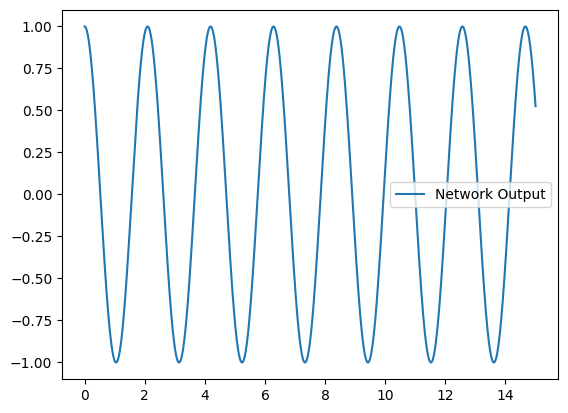

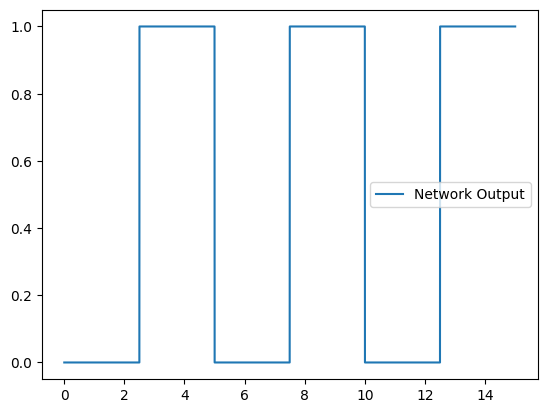

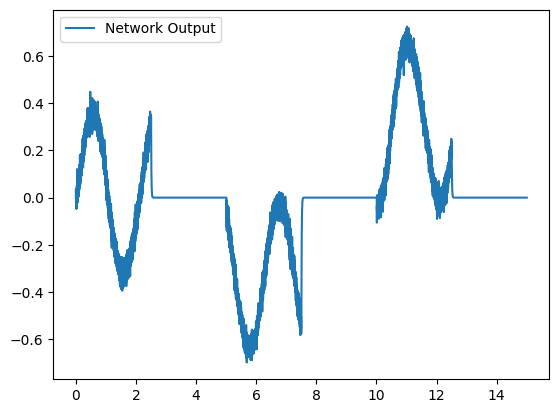

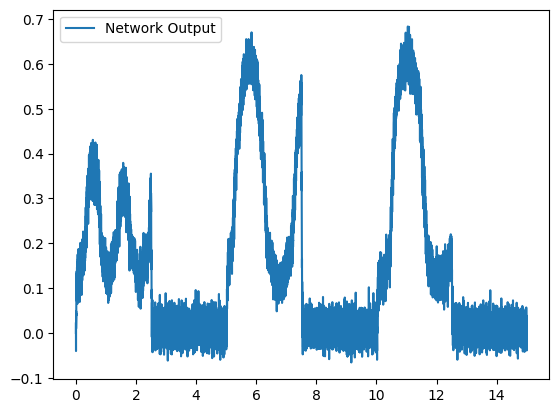

In [45]:
plt.figure()
plt.plot(sim.trange(), sim.data[sin_probe], label="Network Output")
plt.legend()


plt.figure()
plt.plot(sim.trange(), sim.data[inhib_probe], label="Network Output")
plt.legend()


plt.figure()
plt.plot(sim.trange(), sim.data[integrator_probe], label="Network Output")
plt.legend()


plt.figure()
plt.plot(sim.trange(), sim.data[function_probe], label="Network Output")
plt.legend()

### Explain why you got rid of the piece of code you chose to eliminate
Be sure to explain this in terms of _why_ it would have changed your results. Make your response concise but technical!

The functional code takes the input node and links it to the integrator, which, aided by the Tau transform, accumulates the input signal. This integrator ensemble is then connected to the functional ensemble, which serves as our final output. Throughout this process, we also incorporate an inhibitory node that fluctuates due to its piecewise function nature, controlling the activation of the integrator function.

The reason the "rotten egg" code disrupts the output, leading us to opt for its removal, is because the connections are incorrect, bypassing the integrator ensemble in the appropriate sequence. In the flawed lines of code, the input node connects directly to the functional ensemble before reaching the integrator ensemble. Consequently, when we examine the functional ensemble, it mirrors the input node precisely. This occurrence is logical, as we directly link the input to the function without any alterations. When probed, the integrator displays only the positive increments of the original signal, which aligns with our connection method, involving the ABS function applied to the input before feeding it to the integrator. 

A picture is worth a thousand words. For my own future reference here is the drawing I used to figure this out. 
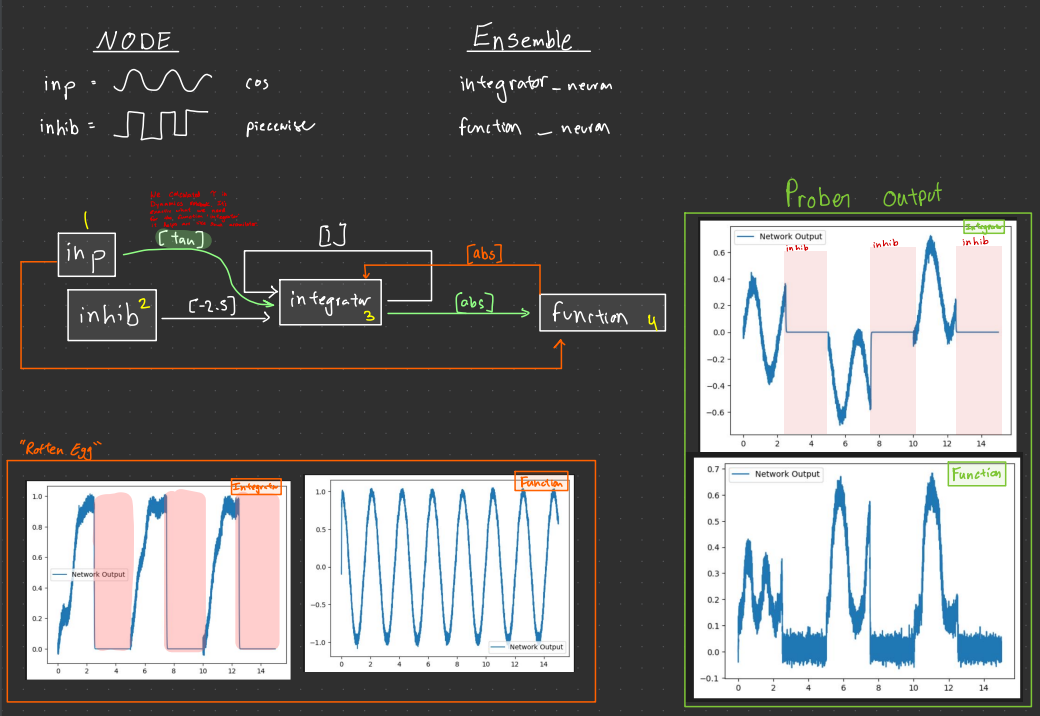

